#### authors: Rafael Dousse, Eva Ray, Massimo Stefani

# Exercise 3 - Linear regression optimisation

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a) Read the data in separate variables for the training and test sets.

In [27]:
dataset_train = pd.read_csv('overfitting_train.csv')
dataset_test = pd.read_csv('overfitting_test.csv')

In [ ]:
dataset_train.head()

,x,y
0,-1.000000,-1.859783
1,0.333333,2.768337
2,1.666667,3.246021
3,3.000000,1.784168
4,4.333333,2.175140


In [80]:
X_train_raw = dataset_train['x'].values
y_train = dataset_train['y'].values
X_test_raw = dataset_test['x'].values
y_test = dataset_test['y'].values

In [81]:
# Min-Max normalization
# Compute min/max ONLY on training set to avoid data leakage as seen in class
X_min = X_train_raw.min()
X_max = X_train_raw.max()

# Apply normalization: (x - min) / (max - min)
X_train = (X_train_raw - X_min) / (X_max - X_min)
X_test = (X_test_raw - X_min) / (X_max - X_min)  # Use SAME min/max from training set

print(f"Original X range: [{X_train_raw.min():.2f}, {X_train_raw.max():.2f}]")
print(f"Normalized X range: [{X_train.min():.2f}, {X_train.max():.2f}]")
print(f"Min-Max parameters from training set: min={X_min:.2f}, max={X_max:.2f}")

Original X range: [-1.00, 11.00]
Normalized X range: [0.00, 1.00]
Min-Max parameters from training set: min=-1.00, max=11.00


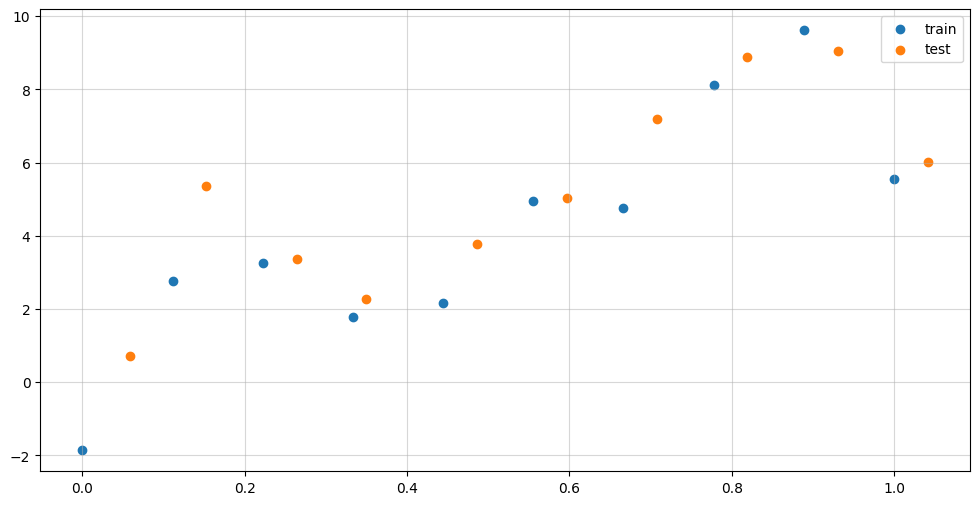

In [82]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test']);

b) Define a cost function
$J(θ)$
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

where $h_{\theta}(\mathbf{x}_{n})$ is your prediction.

In [83]:
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

c) Perform the training for increasing orders $O= 1 ,..., 10$.

You can use any training method developed in the previous practical work. Using the [normal equation](http://mlwiki.org/index.php/Normal_Equation) is probably the easiest choice.

In [84]:
# Training method using the normal equation for polynomial regression

def fit(X_train: np.array, y_train: np.array, order: int) -> np.array:
    """
    Train a polynomial regression model using the normal equation.
    
    Args:
        X_train: Training features (1D array)
        y_train: Training labels (1D array)
        order: Polynomial order (degree)
    
    Returns:
        thetas: Model parameters (coefficients)
    """
    # Create design matrix: [1, x, x^2, x^3, ..., x^order]
    N = X_train.shape[0]
    X_design = np.zeros((N, order + 1))
    
    for i in range(order + 1):
        X_design[:, i] = X_train ** i
    
    # Normal equation: thetas = (X^T * X)^(-1) * X^T * y
    thetas = np.linalg.solve(X_design.T @ X_design, X_design.T @ y_train)
    
    return thetas

def predict(thetas: np.array, X: np.array) -> np.array:
    """
    Make predictions using the trained polynomial model.
    
    Args:
        thetas: Model parameters (coefficients)
        X: Input features (1D array)
    
    Returns:
        y_pred: Predictions
    """
    y_pred = np.zeros(X.shape[0])
    
    # Compute polynomial: y = theta_0 + theta_1*x + theta_2*x^2 + ... + theta_n*x^n
    for i, theta in enumerate(thetas):
        y_pred += theta * (X ** i)

    return y_pred


In [85]:
def plot_polynomial_orders(X_train, y_train, X_test, y_test, orders, show_only_last=False):
    plt.figure(figsize=(12, 6))
    plt.grid(alpha=0.5)
    
    # Add labeled scatter points
    plt.scatter(X_train, y_train, label='Train data', color='blue', alpha=0.6)
    plt.scatter(X_test, y_test, label='Test data', color='orange', alpha=0.6)

    train_cost_curve = []
    test_cost_curve = []

    for order in orders:
        # Fit the model with the current order
        thetas = fit(X_train, y_train, order + 1)
        x = np.linspace(np.min(X_train), np.max(X_train))  # Generate x values for plotting

        # Predict the curve
        y_train_pred_line = predict(thetas, x)

        # Plot only the last one if show_only_last=True
        if not show_only_last or order == orders[-1]:
            plt.plot(x, y_train_pred_line, label=f"Order {order+1}")

        # Compute costs
        y_train_pred = predict(thetas, X_train)
        cost_train = compute_cost(y_train, y_train_pred)
        train_cost_curve.append(cost_train)

        y_test_pred = predict(thetas, X_test)
        cost_test = compute_cost(y_test, y_test_pred)
        test_cost_curve.append(cost_test)

        print(f"Order={order+1}; cost on train set: {cost_train:.2f}; cost on test set: {cost_test:.2f}")

    plt.title("Polynomial Regression for Different Orders" if not show_only_last 
              else f"Polynomial Regression – Order {orders[-1]+1}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    return train_cost_curve, test_cost_curve


Order=1; cost on train set: 1.41; cost on test set: 1.68
Order=2; cost on train set: 1.35; cost on test set: 1.61
Order=3; cost on train set: 1.31; cost on test set: 1.54
Order=4; cost on train set: 0.20; cost on test set: 1.03
Order=5; cost on train set: 0.20; cost on test set: 0.98
Order=6; cost on train set: 0.14; cost on test set: 2.19
Order=7; cost on train set: 0.11; cost on test set: 4.39
Order=8; cost on train set: 0.05; cost on test set: 1.52
Order=9; cost on train set: 0.00; cost on test set: 138.49
Order=10; cost on train set: 0.00; cost on test set: 121.56


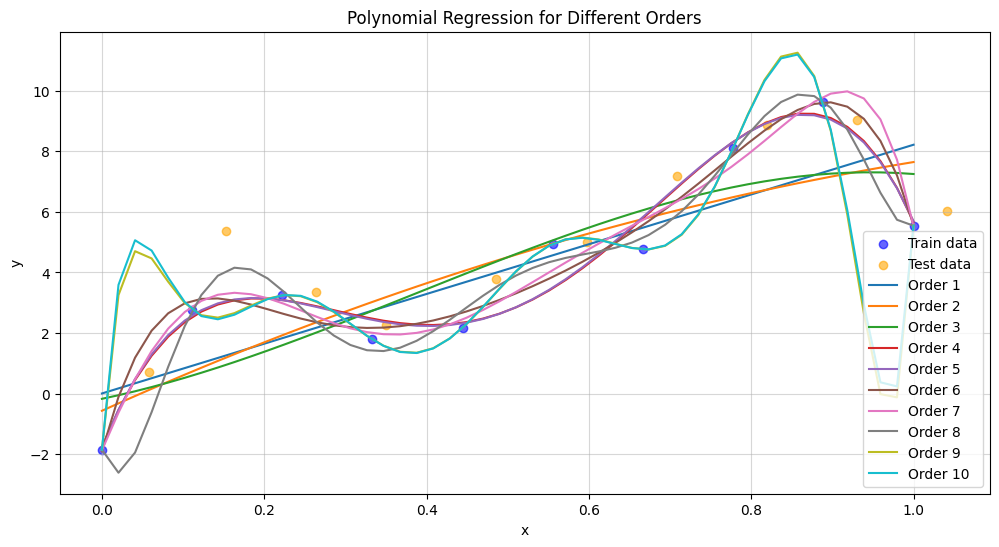

In [86]:
train_cost_curve, test_cost_curve = plot_polynomial_orders(X_train, y_train, X_test, y_test, range(10))

e) Plot the evolution of the costs
$J_{train}(θ)$ and $J_{cv}(θ)$
as a function of the order O.

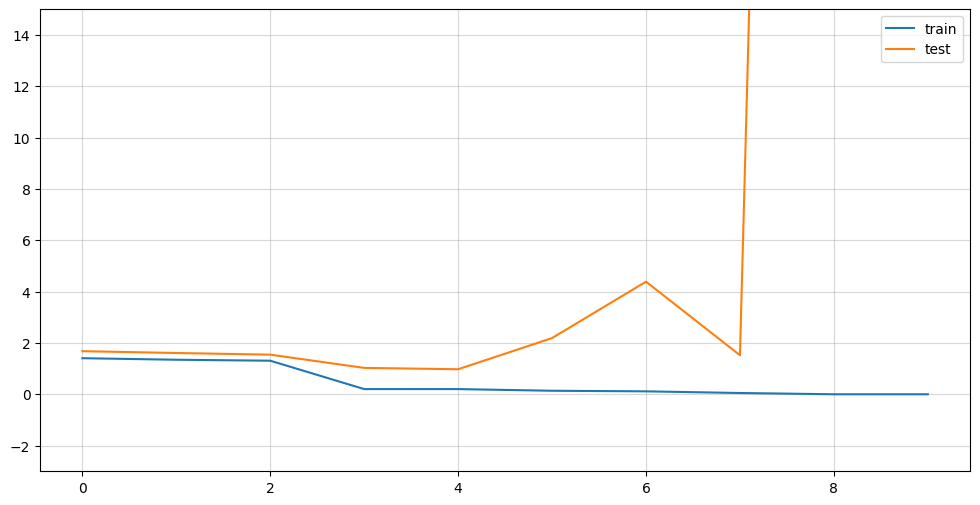

In [87]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.plot(train_cost_curve)
plt.plot(test_cost_curve)
plt.ylim(-3, 15)
plt.legend(['train', 'test']);

**f) What is your best model according to these costs ? Comment your answer.**

In [88]:
# Calculate the difference between test and train costs to detect overfitting
def calculate_overfitting_gap(train_costs, test_costs):
    """
    Calculate the gap between test and train costs.
    A large positive gap indicates overfitting.
    """
    gaps = []
    for i, (train_cost, test_cost) in enumerate(zip(train_costs, test_costs)):
        gap = test_cost - train_cost
        gaps.append(gap)
        print(f"Order {i+1}: Train={train_cost:.2f}, Test={test_cost:.2f}, Gap={gap:.2f}")
    return gaps

gaps = calculate_overfitting_gap(train_cost_curve, test_cost_curve)

best_order = np.argmin(test_cost_curve) + 1
print(f"\nBest model based on test cost: Order {best_order}")
print(f"Test cost: {test_cost_curve[best_order-1]:.2f}")
print(f"Gap (overfitting indicator): {gaps[best_order-1]:.2f}")

Order 1: Train=1.41, Test=1.68, Gap=0.27
Order 2: Train=1.35, Test=1.61, Gap=0.26
Order 3: Train=1.31, Test=1.54, Gap=0.24
Order 4: Train=0.20, Test=1.03, Gap=0.83
Order 5: Train=0.20, Test=0.98, Gap=0.77
Order 6: Train=0.14, Test=2.19, Gap=2.05
Order 7: Train=0.11, Test=4.39, Gap=4.27
Order 8: Train=0.05, Test=1.52, Gap=1.47
Order 9: Train=0.00, Test=138.49, Gap=138.49
Order 10: Train=0.00, Test=121.56, Gap=121.56

Best model based on test cost: Order 5
Test cost: 0.98
Gap (overfitting indicator): 0.77


The best model according to the costs is between order 3 and 4. 

Looking at the test cost curve, the minimum test error occurs around order 3-4, which represents the best balance between bias and variance. 

- Orders 1-2: High test cost -> underfitting
- Orders 3-4: Low test cost with minimal gap -> good generalization (optimal complexity)
- Orders 5-10: Test cost increases despite decreasing train cost -> overfitting (model too complex, high variance)

The gap between test and train costs is minimal around order 3-4, indicating the model generalizes well to unseen data without memorizing the training set.

**g) Would you still choose the model with the lowest cost for production?**

Not necessarily. While order 3-4 has the lowest test cost, for me we must consider two factors:

1. Simplicity: A simpler model (order 2-3) might be preferred if the performance difference is negligible.
2. Computational cost: Lower order models are faster to train and predict

In production, we might choose order 3 as it offers a good trade-off between performance and complexity. The small improvement from order 3 to 4 might not justify the added complexity.

**h) Explain how under/over-fitting is involved here.**

Order=1; cost on train set: 1.41; cost on test set: 1.68


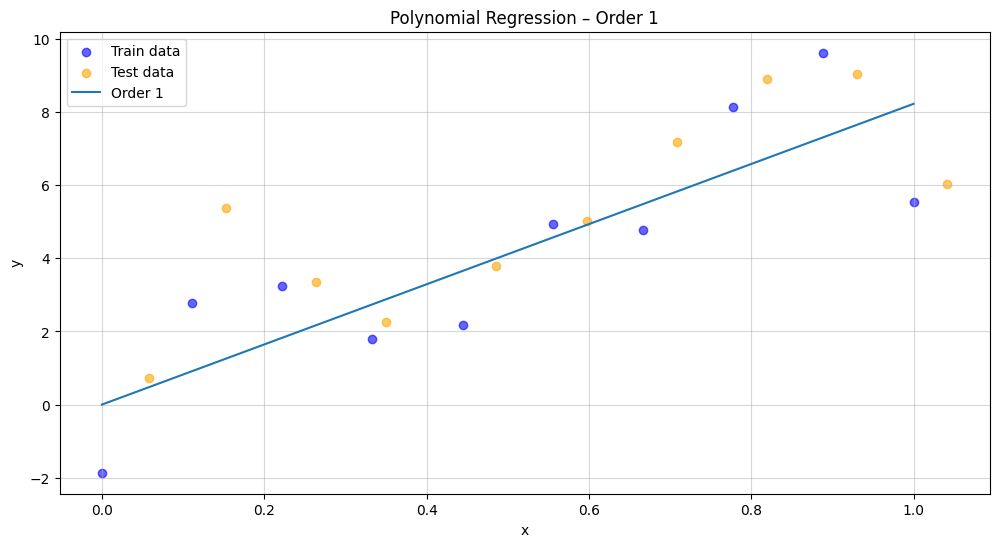

([np.float64(1.4056213159701736)], [np.float64(1.6789843074874646)])

In [89]:
plot_polynomial_orders(X_train, y_train, X_test, y_test, range(1), show_only_last=True)


Order=1; cost on train set: 1.41; cost on test set: 1.68
Order=2; cost on train set: 1.35; cost on test set: 1.61
Order=3; cost on train set: 1.31; cost on test set: 1.54
Order=4; cost on train set: 0.20; cost on test set: 1.03
Order=5; cost on train set: 0.20; cost on test set: 0.98
Order=6; cost on train set: 0.14; cost on test set: 2.19
Order=7; cost on train set: 0.11; cost on test set: 4.39
Order=8; cost on train set: 0.05; cost on test set: 1.52
Order=9; cost on train set: 0.00; cost on test set: 138.49
Order=10; cost on train set: 0.00; cost on test set: 121.56


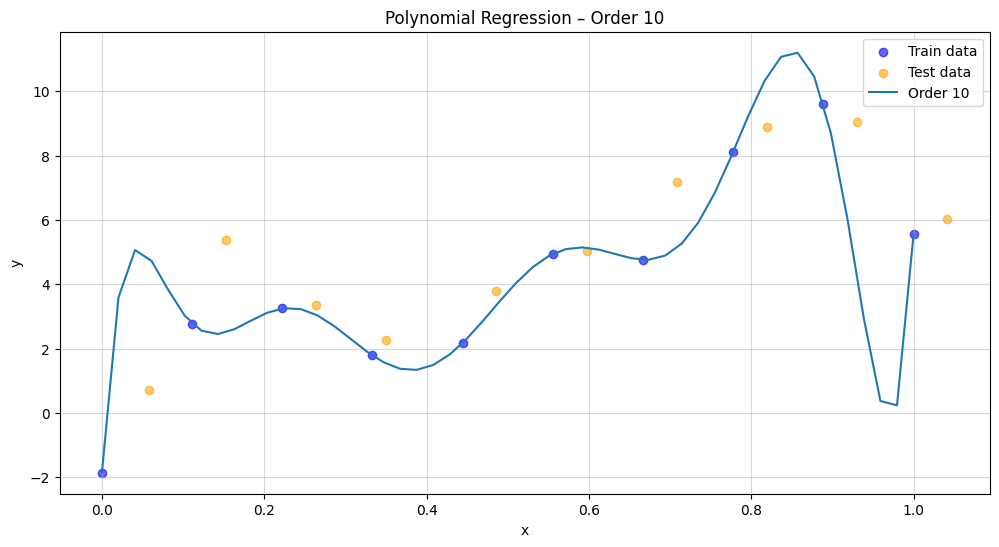

([np.float64(1.4056213159701736),
  np.float64(1.34562226118169),
  np.float64(1.3076503349412905),
  np.float64(0.20232582972193966),
  np.float64(0.2018151512053569),
  np.float64(0.13727357593329728),
  np.float64(0.11415158720432772),
  np.float64(0.0497516808034206),
  np.float64(4.110386214859435e-07),
  np.float64(2.9656734317055947e-08)],
 [np.float64(1.6789843074874646),
  np.float64(1.608308151257436),
  np.float64(1.5433547612022065),
  np.float64(1.027985696930406),
  np.float64(0.975212620558239),
  np.float64(2.189562448704432),
  np.float64(4.387467407165688),
  np.float64(1.5214067628166614),
  np.float64(138.48653608864095),
  np.float64(121.56236455873909)])

In [90]:
plot_polynomial_orders(X_train, y_train, X_test, y_test, range(10), show_only_last=True)

The best way to understand what’s happening is to look at the extreme cases.
With an order of 1 (simple linear regression), the straight line is clearly not sufficient to capture the non-linear structure of the data. The line goes “through the middle” of the points but doesn’t follow their natural curvature. This is a classic case of underfitting, where the model is too simple to represent the true complexity of the data.

On the other hand, when using an order of 10, our polynomial regression ends up passing through all the training points (since we only have 10 points). The polynomial produces wild oscillations and very complex curves just to minimize the training error. In other words, the model has memorized the data instead of learning the underlying pattern. That’s why it performs very poorly on the test set. It hasn’t generalized; it has simply memorized the noise and specific quirks of the training data.